<a href="https://www.kaggle.com/tej1234/exploratory-data-analysis-all-lending-club-loan?scriptVersionId=88617952" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## 1: Loading Dependencies, Packages and Data

In [1]:
class EDA:
    def __init__(self, data):
        self.data = data

    @staticmethod
    def plot1(data):
        fig = missingno.matrix(data)
        return fig
    
    @staticmethod
    def plot2(data):
        fig = plt.figure(figsize=(20,5))
        sns.countplot(y='loan_status', data=data);

    
    @staticmethod
    def plot3(data):
        fig = plt.figure(figsize=(20,5))
        sns.heatmap(acc_df.corr(), annot=True, cmap='viridis');
    
    @staticmethod
    def plot4(data):
        fig = plt.figure(figsize=(20, 4))
        sns.countplot(y="grade", data=data)
    
    @staticmethod
    def plot5(data):
        fig = plt.figure(figsize=(10, 10))
        sns.histplot(data=data, x="installment", bins=30, kde=True, hue="loan_status")
    
    
    @staticmethod
    def plot6(paid_charged):
        plt.figure(figsize=(15, 20))

        plt.subplot(4, 2, 1)
        sns.countplot(x='term', data=paid_charged, hue='loan_status')

        plt.subplot(4, 2, 2)
        sns.countplot(x='home_ownership', data=paid_charged, hue='loan_status')

        plt.subplot(4, 2, 3)
        sns.countplot(x='verification_status', data=paid_charged, hue='loan_status')

        plt.subplot(4, 2, 4)
        g = sns.countplot(x='purpose', data=paid_charged, hue='loan_status')
        g.set_xticklabels(g.get_xticklabels(), rotation=90);
    
    @staticmethod
    def plot7(paid_charged):
        plt.figure(figsize=(15, 10))

        plt.subplot(2, 2, 1)
        grade = sorted(paid_charged.grade.unique().tolist())
        sns.countplot(x='grade', data=paid_charged, hue='loan_status', order=grade)

        plt.subplot(2, 2, 2)
        sub_grade = sorted(paid_charged.sub_grade.unique().tolist())
        g = sns.countplot(x='sub_grade', data=paid_charged, hue='loan_status', order=sub_grade)
        g.set_xticklabels(g.get_xticklabels(), rotation=90);
    
    @staticmethod
    def plot8(paid_charged):
        plt.figure(figsize=(8, 6))
        order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
                  '6 years', '7 years', '8 years', '9 years', '10+ years',]
        g = sns.countplot(x='emp_length', data=paid_charged, hue='loan_status', order=order)
        g.set_xticklabels(g.get_xticklabels(), rotation=90);
    
    @staticmethod
    def plot9(paid_charged):
        plt.figure(figsize=(8, 6))
        plt.barh(paid_charged.emp_title.value_counts()[:40].index, paid_charged.emp_title.value_counts()[:40])
        plt.title("The most 30 jobs title afforded a loan")
        plt.tight_layout()
    
    @staticmethod
    def plot10(paid_charged):
        plt.figure(figsize=(8, 6))
        sns.countplot(x="application_type", data=paid_charged, hue="loan_status")


In [2]:
# Core Dependencies
import re
import os

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.options.display.min_rows = 200

# Visualization 
import matplotlib.pyplot as plt
import missingno
%matplotlib inline 
import seaborn as sns
plt.style.use('seaborn-whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [3]:
accepted_file = "../input/lending-club/accepted_2007_to_2018Q4.csv.gz"
rejected_file = "../input/lending-club/rejected_2007_to_2018Q4.csv.gz"

In [4]:
acc_df = pd.read_csv(accepted_file)
rej_df = pd.read_csv(rejected_file)

In [5]:
print(acc_df.shape)
print(rej_df.shape)

(2260701, 151)
(27648741, 9)


## 2: Feature Selection

Due to the large volume of data in the `accepted_2007_to_2018Q4.csv.gz`, of aroud - **(2260701, 151)**. I would be selectively choosing the columns based on the relevancy of the assignment

In [6]:
columns = ["loan_amnt", "term", "int_rate", "installment", "grade", "sub_grade", "emp_title",
           "emp_length", "home_ownership", "annual_inc", "verification_status", "issue_d", "loan_status",
           "purpose", "title", "dti", "earliest_cr_line", "open_acc", "pub_rec", "revol_bal", "revol_util",
           "total_acc", "initial_list_status", "application_type", "mort_acc", "pub_rec_bankruptcies", "address"]

Finding the intersection between the above columns and the dataframe columns (used for selection) and also excluding columns further which have atleast 20% NaN values.

In [7]:
acc_df = acc_df[acc_df.columns.intersection(columns)]

perc = 20.0 
min_count =  int(((100-perc)/100)*acc_df.shape[0] + 1)
acc_df = acc_df.dropna( axis=1, 
                thresh=min_count)

acc_df = acc_df.sample(frac=0.5, replace=True, random_state=1)

In [8]:
# New shape of the dataframe
acc_df.shape

(1130350, 26)

Birds eye view of the both the datasets

In [9]:
acc_df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,1.130337e+06,1.130337e+06,1.130337e+06,1.130333e+06,1.129516e+06,1.130324e+06,1.130324e+06,1.130337e+06,1.129472e+06,1.130324e+06,1.105354e+06,1.129672e+06
mean,1.504085e+04,1.309147e+01,4.455987e+02,7.796553e+04,1.883680e+01,1.162224e+01,1.963313e-01,1.668276e+04,5.033818e+01,2.417486e+01,1.552608e+00,1.280080e-01
std,9.189619e+03,4.833672e+00,2.671900e+02,7.570157e+04,1.428783e+01,5.644824e+00,5.596043e-01,2.303681e+04,2.470416e+01,1.199936e+01,1.906154e+00,3.644827e-01
min,5.000000e+02,5.310000e+00,7.610000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,9.490000e+00,2.515800e+02,4.600000e+04,1.191000e+01,8.000000e+00,0.000000e+00,5.962000e+03,3.150000e+01,1.500000e+01,0.000000e+00,0.000000e+00
50%,1.292500e+04,1.262000e+01,3.776200e+02,6.500000e+04,1.785000e+01,1.100000e+01,0.000000e+00,1.134100e+04,5.030000e+01,2.200000e+01,1.000000e+00,0.000000e+00
75%,2.000000e+04,1.599000e+01,5.930600e+02,9.300000e+04,2.451000e+01,1.400000e+01,0.000000e+00,2.025400e+04,6.932500e+01,3.100000e+01,3.000000e+00,0.000000e+00
max,4.000000e+04,3.099000e+01,1.715420e+03,9.930475e+06,9.990000e+02,9.700000e+01,6.300000e+01,2.568995e+06,3.666000e+02,1.760000e+02,8.700000e+01,9.000000e+00


In [10]:
rej_df.describe()

,Amount Requested,Risk_Score,Policy Code
count,2.764874e+07,9.151111e+06,2.764782e+07
mean,1.313324e+04,6.281721e+02,6.375113e-03
std,1.500964e+04,8.993679e+01,1.127368e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.800000e+03,5.910000e+02,0.000000e+00
50%,1.000000e+04,6.370000e+02,0.000000e+00
75%,2.000000e+04,6.750000e+02,0.000000e+00
max,1.400000e+06,9.900000e+02,2.000000e+00


In [11]:
acc_df = acc_df.loc[~acc_df.index.duplicated(), :]

## 3: Visualization Plots

### 3.0 Helper Functions


In [12]:
def missing_value_counter(df):
    percent_missing_values = df.isnull().sum()
    percent_missing_percentage = df.isnull().sum() * 100 / len(df)
    
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing_percentage,
                                    'count_missing': percent_missing_values})
    missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
    return missing_value_df.head(10)

### 3.1 Missing Value Visualization

The plot below gives an overview of the columnes and their missing data.

<AxesSubplot:>

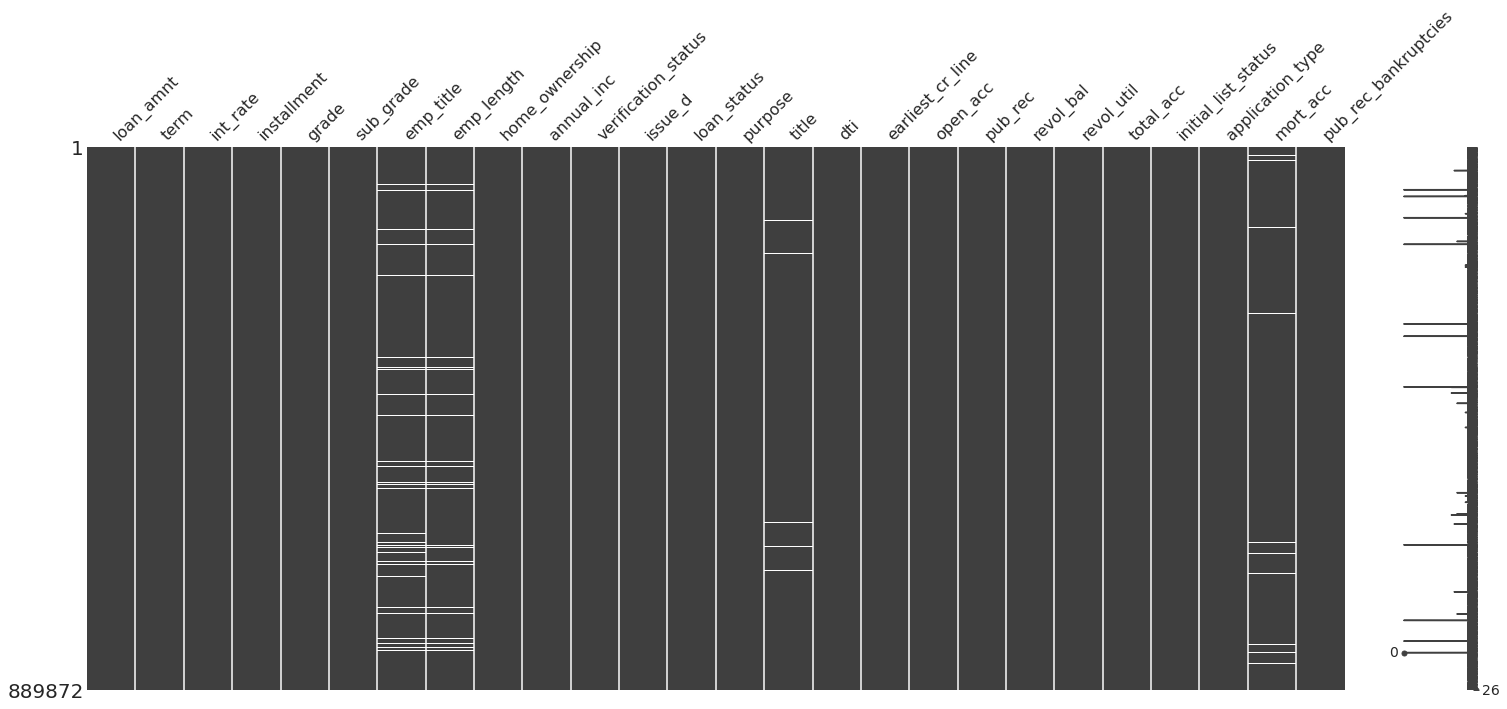

In [13]:
EDA.plot1(acc_df)

In [14]:
missing_value_counter(acc_df)

,column_name,percent_missing,count_missing
emp_title,emp_title,7.361621,65509
emp_length,emp_length,6.474190,57612
mort_acc,mort_acc,2.206722,19637
title,title,1.053073,9371
revol_util,revol_util,0.081023,721
dti,dti,0.075179,669
pub_rec_bankruptcies,pub_rec_bankruptcies,0.059447,529
total_acc,total_acc,0.002472,22
pub_rec,pub_rec,0.002472,22
open_acc,open_acc,0.002472,22


The above is a count and percentage of the top 10 missing values of the accpeted data

## 3.2 Loan Status Count

This plot show the count of account based on their loan status

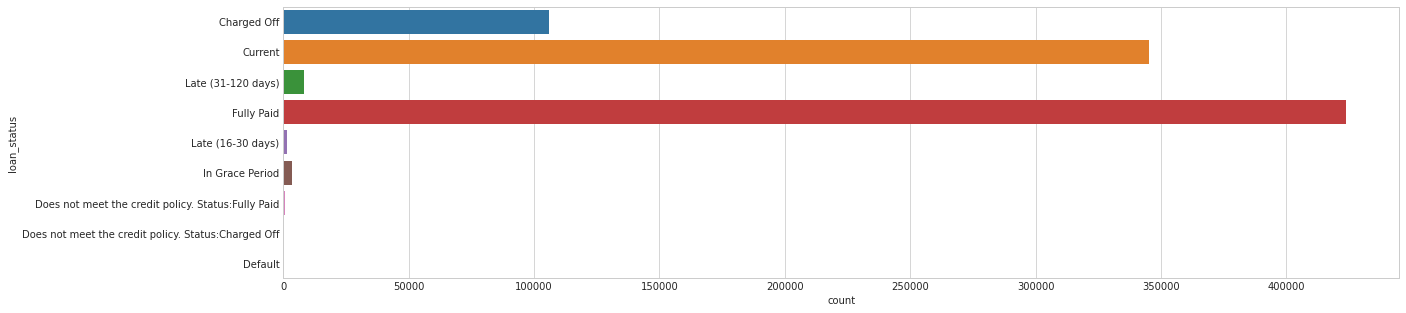

In [15]:
EDA.plot2(acc_df)

Fully paid are the highest followed by current and the charged off. Most of the loan accounts are either paid off or the payment is still in progress

## 3.3 HeatMap

The below heatmap shows a correlation between attributes. A few key observations from the heatmap is that:
- installment and loan amount are heavily correlated, which implies greater the loan amount, higher the installments and vice versa.
- total_acc and open_acc are correlated
- publci_rec_bankruptcies and public_rec are correlated

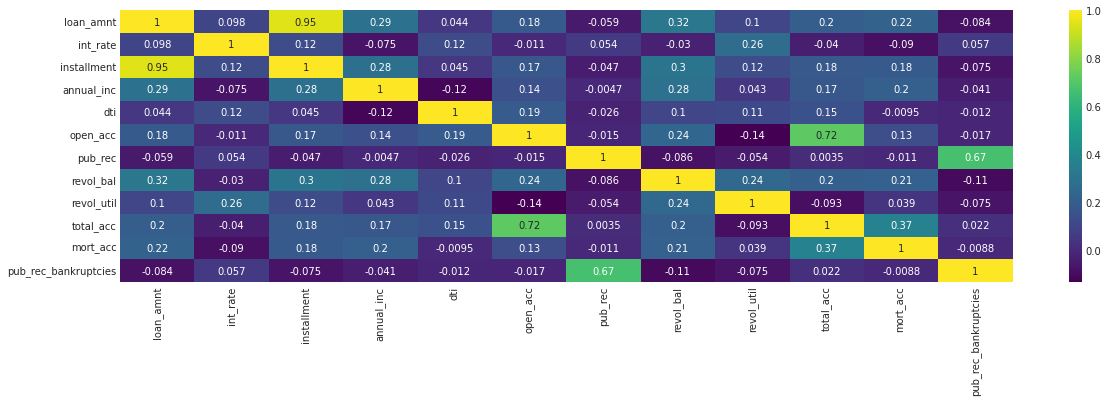

In [16]:
EDA.plot3(acc_df)

## 3.4 Grade Count Plot

A higher LC assigned loan grade implies the more likely a borrower would repay the loan. The acceptance rate is more distributed to candidates with a grade of `A, B and C`. 

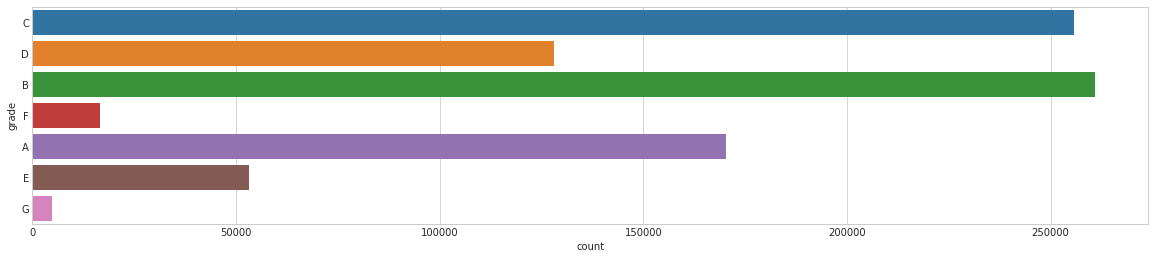

In [17]:
EDA.plot4(acc_df)

## 3.5 Installment vs Loan Status vs Count

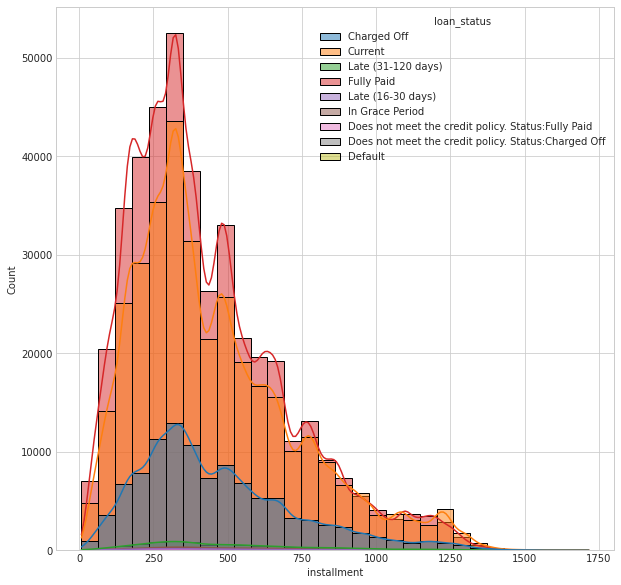

In [18]:
EDA.plot5(acc_df)

## 3.6 Loan Status vs Other Attributes

The below plots have 4 subplots where each certain significance <br>
- **Plot 1:** Terms vs Loan Status - Relation between how terms affected the loan status. 
- **Plot 2:** Home Onwership vs Loan Status - No significant differnece between this comparision
- **Plot 3:** Verification Status vs Loan Status 
- **Plot 4:** Debt vs Loan Status - Loan charged off significantly for debt consolidation



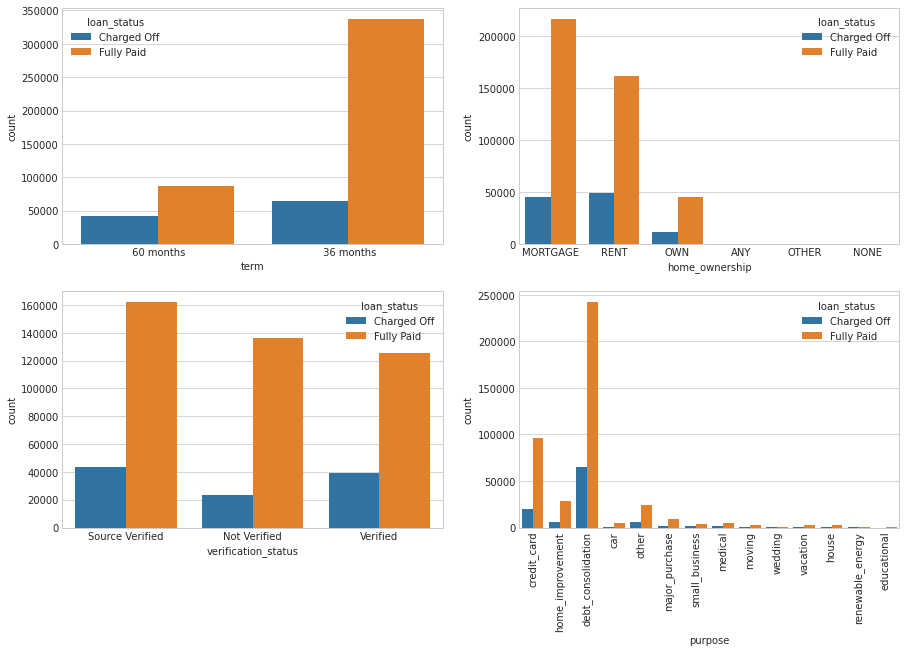

In [19]:
paid_charged = acc_df.loc[(acc_df["loan_status"] == "Fully Paid") | (acc_df["loan_status"] == "Charged Off")]
EDA.plot6(paid_charged)

## 3.7 Grade vs Loan Status
Key Observations:
- As grade goes higher the count of charged off increases. There is a higher risk in allocating loan to candidates with a higher grade.
- Grade C onwards has higher loan fully paid to charged off ratio.
- Looking at the sub grade, it follows a normal distribution of loan fully paid to charged off ratio.

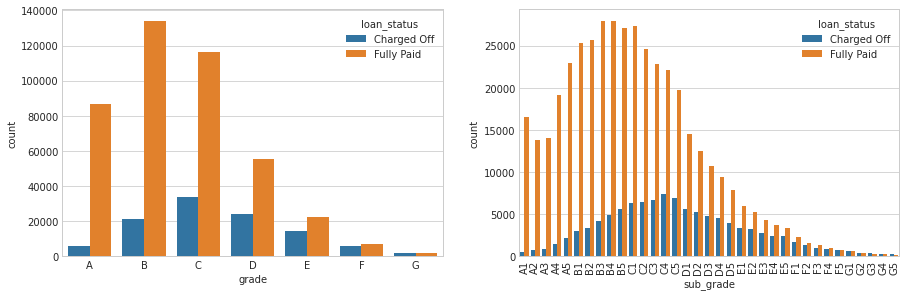

In [20]:
EDA.plot7(paid_charged)

## 3.8 Employment vs Loan Status
- Candidates with over 10+ years of experience tend to have lower fully paid to charged off ratio

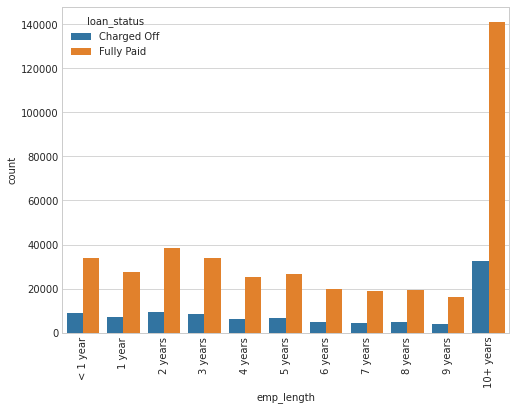

In [21]:
EDA.plot8(paid_charged)

## 3.9 Employee Title vs Loans Accepted
- Maximum number of loans are accepted for professions with a more stable jobs (according to the society) like Teacher, Nurse, Owner and etc..

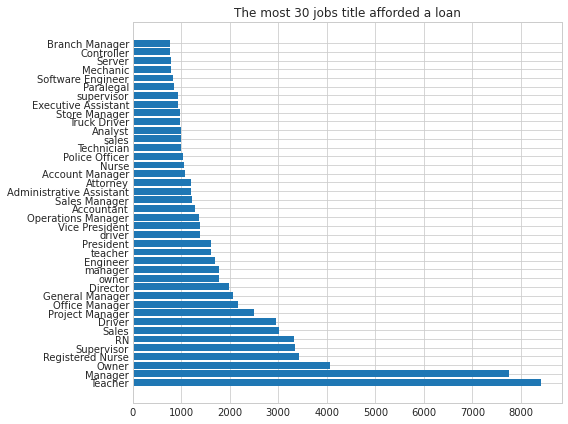

In [22]:
EDA.plot9(paid_charged)

## 3.10 Application Type vs Loan Status
- This plot focuses more on loan status in accordance with the application type

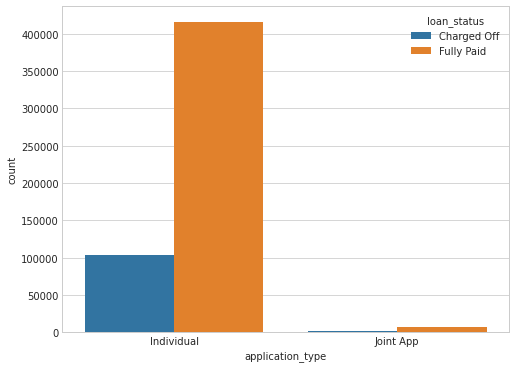

In [23]:
EDA.plot10(paid_charged)